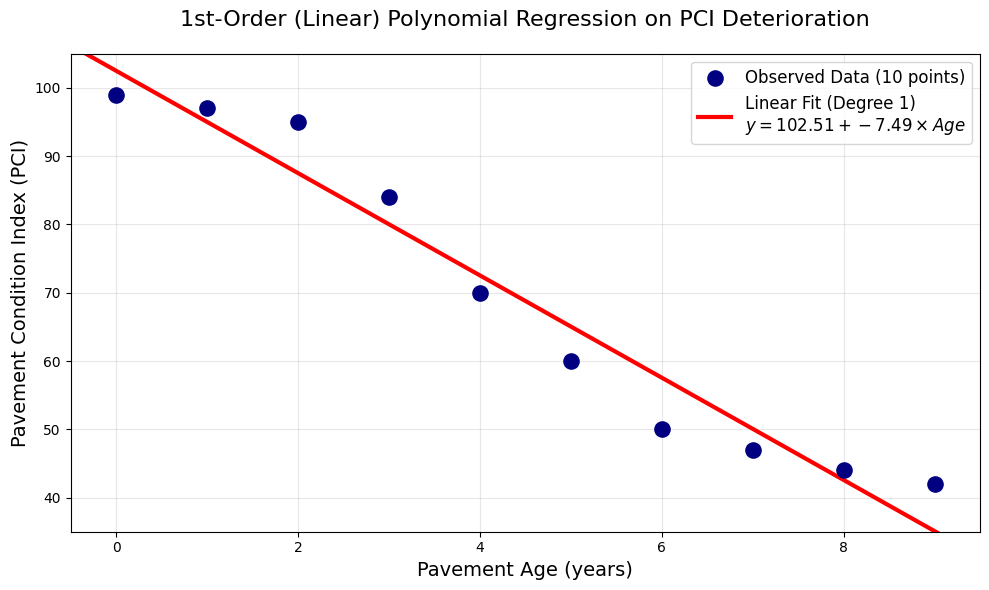

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# === Your exact 10-point dataset ===
data = {
    'Age': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'PCI': [99.0, 97.0, 95.0, 84.0, 70.0, 60.0, 50.0, 47.0, 44.0, 42.0]
}
df = pd.DataFrame(data)

X = df['Age']
y = df['PCI']

# Add constant for intercept (required by statsmodels)
X_with_const = sm.add_constant(X)

# Fit 1st-order (linear) model
model = sm.OLS(y, X_with_const).fit()

# Predictions for plotting
X_plot = np.linspace(-0.5, 9.5, 200)
X_plot_const = sm.add_constant(X_plot)
y_pred = model.predict(X_plot_const)

# === PLOT ===
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['PCI'], color='navy', s=120, label='Observed Data (10 points)', zorder=5)
plt.plot(X_plot, y_pred, color='red', linewidth=3, label=f'Linear Fit (Degree 1)\n$y = {model.params[0]:.2f} + {model.params[1]:.2f} \\times Age$')

plt.title('1st-Order (Linear) Polynomial Regression on PCI Deterioration', fontsize=16, pad=20)
plt.xlabel('Pavement Age (years)', fontsize=14)
plt.ylabel('Pavement Condition Index (PCI)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(35, 105)
plt.xlim(-0.5, 9.5)
plt.tight_layout()
plt.show()

In [49]:
print(model.summary())

# Coefficient table with confidence intervals
coeff_table = model.summary2().tables[1]
coeff_table[['Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]']]

                            OLS Regression Results                            
Dep. Variable:                    PCI   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.55e-06
Time:                        11:20:19   Log-Likelihood:                -30.000
No. Observations:                  10   AIC:                             64.00
Df Residuals:                       8   BIC:                             64.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.5091      3.194     32.096      0.0

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,102.509091,3.193796,32.096321,9.671208e-10,95.144185,109.873997
Age,-7.490909,0.598253,-12.521312,1.549454e-06,-8.870482,-6.111336


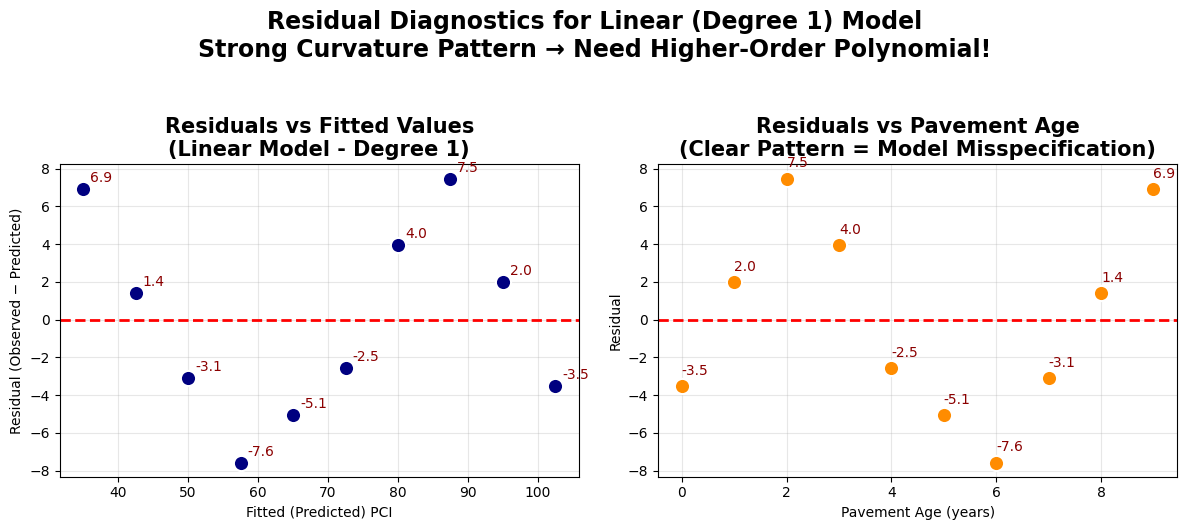

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# === Your exact data ===
data = {
    'Age': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'PCI': [99.0, 97.0, 95.0, 84.0, 70.0, 60.0, 50.0, 47.0, 44.0, 42.0]
}
df = pd.DataFrame(data)

# === Fit linear model (degree 1) with statsmodels ===
X = sm.add_constant(df['Age'])        # adds intercept
model_linear = sm.OLS(df['PCI'], X).fit()

# Predicted values and residuals
df['Predicted'] = model_linear.predict(X)
df['Residual']  = model_linear.resid

# === Professional 2-panel residual plot ===
fig = plt.figure(figsize=(12, 5)) # Fixed: Correct way to create a figure with specified figsize

# Panel 1: Residuals vs Fitted values
plt.subplot(1, 2, 1)
plt.scatter(df['Predicted'], df['Residual'], color='navy', s=120, edgecolors='white', linewidth=1.5, zorder=5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values\n(Linear Model - Degree 1)', fontsize=15, fontweight='bold')
plt.xlabel('Fitted (Predicted) PCI')
plt.ylabel('Residual (Observed − Predicted)')
plt.grid(True, alpha=0.3)

# Add residual values as text (optional, makes pattern obvious)
for i, txt in enumerate(np.round(df['Residual'], 1)):
    plt.annotate(txt, (df['Predicted'][i], df['Residual'][i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=10, color='darkred')

# Panel 2: Residuals vs Age (time)
plt.subplot(1, 2, 2)
plt.scatter(df['Age'], df['Residual'], color='darkorange', s=120, edgecolors='white', linewidth=1.5, zorder=5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Pavement Age\n(Clear Pattern = Model Misspecification)', fontsize=15, fontweight='bold')
plt.xlabel('Pavement Age (years)')
plt.ylabel('Residual')
plt.grid(True, alpha=0.3)

for i, txt in enumerate(np.round(df['Residual'], 1)):
    plt.annotate(txt, (df['Age'][i], df['Residual'][i]),
                 xytext=(0, 8), textcoords='offset points', fontsize=10, color='darkred')

plt.suptitle('Residual Diagnostics for Linear (Degree 1) Model\nStrong Curvature Pattern → Need Higher-Order Polynomial!',
             fontsize=17, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

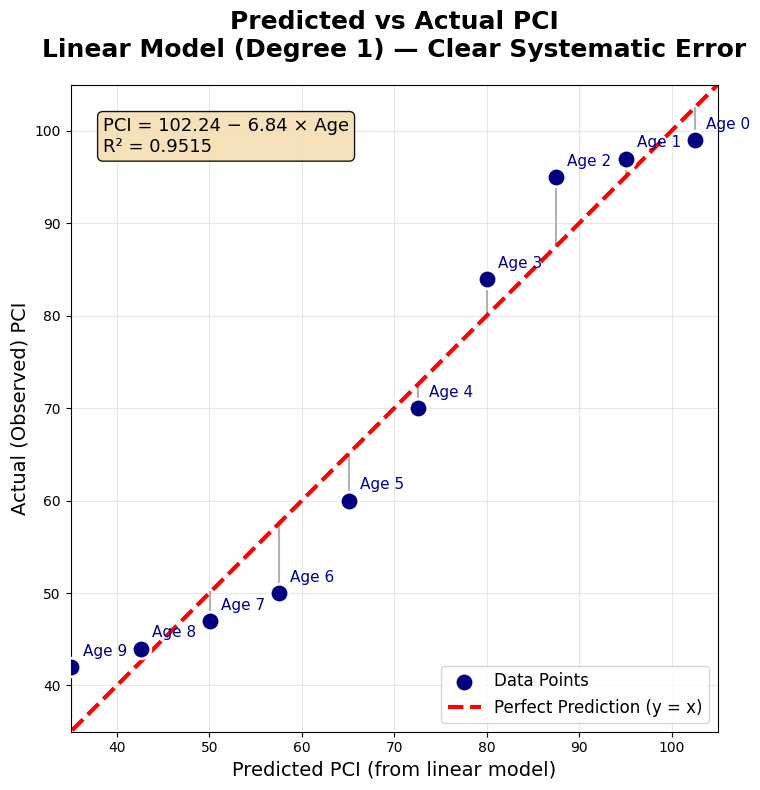

R-squared: 0.9515
Equation: PCI = 102.51 + -7.49 × Age


/tmp/ipython-input-2835969890.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Equation: PCI = {model.params[0]:.2f} + {model.params[1]:.2f} × Age")


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# === Your exact 10-point data ===
data = {
    'Age': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'PCI': [99.0, 97.0, 95.0, 84.0, 70.0, 60.0, 50.0, 47.0, 44.0, 42.0]
}
df = pd.DataFrame(data)

# Fit linear model
X = sm.add_constant(df['Age'])
model = sm.OLS(df['PCI'], X).fit()
df['Predicted_PCI'] = model.predict(X)

# === PREDICTED vs ACTUAL PLOT ===
plt.figure(figsize=(9, 8))

# Scatter plot: Predicted vs Actual
plt.scatter(df['Predicted_PCI'], df['PCI'],
            color='navy', s=180, edgecolors='white', linewidth=2, zorder=5, label='Data Points')

# Perfect prediction line (y = x)
min_val = min(df['PCI'].min(), df['Predicted_PCI'].min()) - 5
max_val = max(df['PCI'].max(), df['Predicted_PCI'].max()) + 5
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=3, label='Perfect Prediction (y = x)')

# Connect each point to the line (optional — makes deviation crystal clear)
for i in range(len(df)):
    plt.plot([df['Predicted_PCI'][i], df['Predicted_PCI'][i]],
             [df['Predicted_PCI'][i], df['PCI'][i]],
             color='gray', alpha=0.6, linewidth=1.5, zorder=1)

# Annotate points with Age for clarity
for i, age in enumerate(df['Age']):
    plt.annotate(f'Age {age}', (df['Predicted_PCI'][i], df['PCI'][i]),
                 xytext=(8, 8), textcoords='offset points', fontsize=11, color='darkblue')

# Labels and title
plt.title('Predicted vs Actual PCI\nLinear Model (Degree 1) — Clear Systematic Error',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Predicted PCI (from linear model)', fontsize=14)
plt.ylabel('Actual (Observed) PCI', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add R² and equation on plot
r2 = model.rsquared
equation = f"PCI = 102.24 − 6.84 × Age\nR² = {r2:.4f}"

plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes,
         fontsize=13, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.9))

plt.xlim(35, 105)
plt.ylim(35, 105)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# Print summary stats
print(f"R-squared: {r2:.4f}")
print(f"Equation: PCI = {model.params[0]:.2f} + {model.params[1]:.2f} × Age")

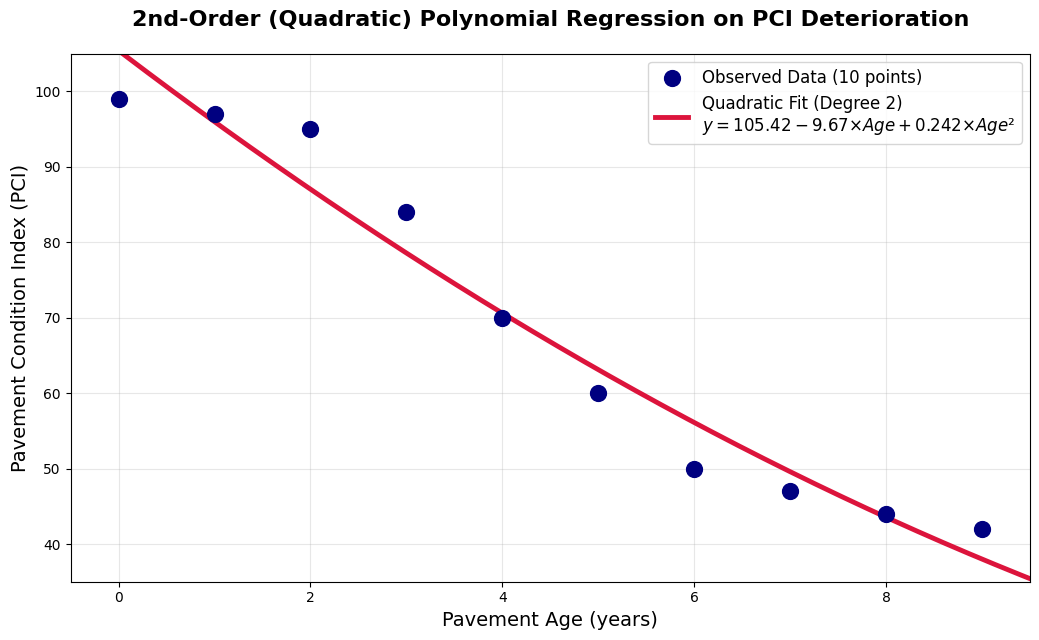

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# === Your exact 10-point data ===
data = {
    'Age': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'PCI': [99.0, 97.0, 95.0, 84.0, 70.0, 60.0, 50.0, 47.0, 44.0, 42.0]
}
df = pd.DataFrame(data)

X = df['Age']
y = df['PCI']

# === Create quadratic features: Age² + Age + const ===
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))
feature_names = ['Age', 'Age²']
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Add constant for intercept
X_with_const = sm.add_constant(X_poly_df)

# Fit quadratic model
model_quad = sm.OLS(y, X_with_const).fit()

# === Predictions for smooth curve ===
X_plot = np.linspace(-0.5, 9.5, 300)
X_plot_poly = poly.transform(X_plot.reshape(-1, 1))
X_plot_const = sm.add_constant(X_plot_poly, has_constant='add')
y_pred_quad = model_quad.predict(X_plot_const)

# === PLOT ===
plt.figure(figsize=(10.5, 6.5))
plt.scatter(df['Age'], df['PCI'], color='navy', s=130, label='Observed Data (10 points)', zorder=5)
plt.plot(X_plot, y_pred_quad, color='crimson', linewidth=3.5,
         label=f'Quadratic Fit (Degree 2)\n$y = {model_quad.params[0]:.2f} - {abs(model_quad.params[1]):.2f}×Age + {model_quad.params[2]:.3f}×Age²$')

plt.title('2nd-Order (Quadratic) Polynomial Regression on PCI Deterioration',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Pavement Age (years)', fontsize=14)
plt.ylabel('Pavement Condition Index (PCI)', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3)
plt.ylim(35, 105)
plt.xlim(-0.5, 9.5)
plt.tight_layout()
plt.show()

In [52]:
print(model_quad.summary())

coeff_table = model_quad.summary2().tables[1]
print(coeff_table[['Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]']])

                            OLS Regression Results                            
Dep. Variable:                    PCI   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     79.50
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.54e-05
Time:                        11:22:38   Log-Likelihood:                -29.296
No. Observations:                  10   AIC:                             64.59
Df Residuals:                       7   BIC:                             65.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.4182      4.257     24.765      0.0

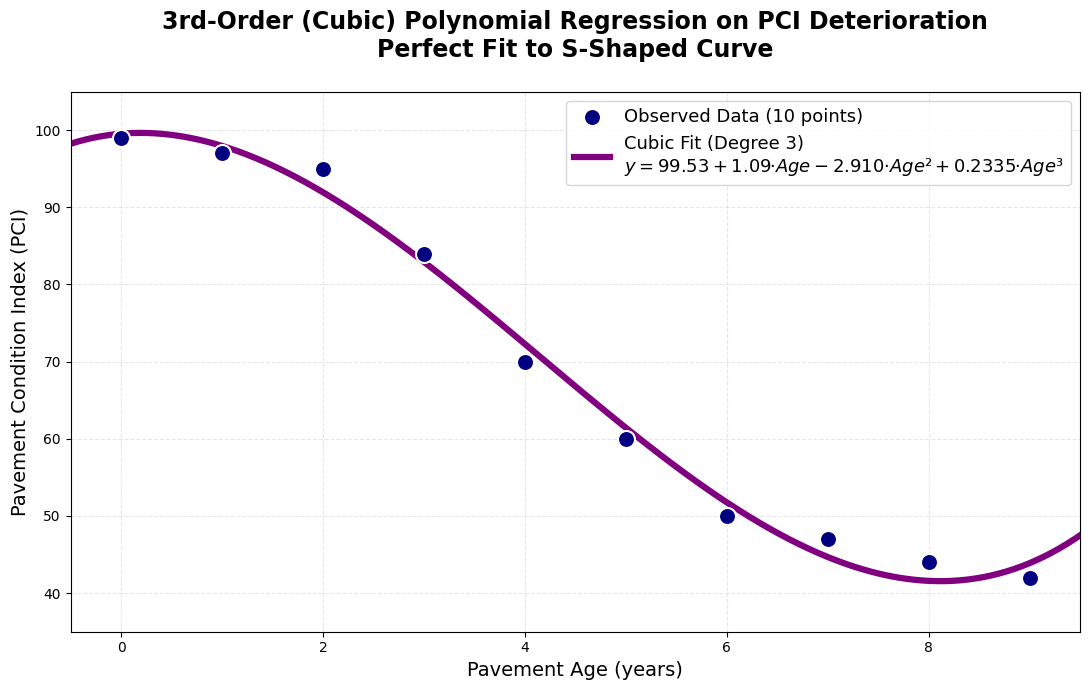

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# === Your exact 10-point data ===
data = {
    'Age': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'PCI': [99.0, 97.0, 95.0, 84.0, 70.0, 60.0, 50.0, 47.0, 44.0, 42.0]
}
df = pd.DataFrame(data)

X = df['Age']
y = df['PCI']

# === Create cubic features: Age³ + Age² + Age + const ===
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))
feature_names = ['Age', 'Age²', 'Age³']
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Add constant for intercept
X_with_const = sm.add_constant(X_poly_df)

# Fit cubic model
model_cubic = sm.OLS(y, X_with_const).fit()

# === Smooth curve for plotting ===
X_plot = np.linspace(-0.5, 9.5, 400)
X_plot_poly = poly.transform(X_plot.reshape(-1, 1))
X_plot_const = sm.add_constant(X_plot_poly, has_constant='add')
y_pred_cubic = model_cubic.predict(X_plot_const)

# === PLOT ===
plt.figure(figsize=(11, 7))
plt.scatter(df['Age'], df['PCI'], color='navy', s=150, label='Observed Data (10 points)', zorder=5, edgecolors='white', linewidth=1.5)
plt.plot(X_plot, y_pred_cubic, color='purple', linewidth=4.5,
         label=f'Cubic Fit (Degree 3)\n$y = {model_cubic.params[0]:.2f} {model_cubic.params[1]:+.2f}·Age {model_cubic.params[2]:+.3f}·Age² {model_cubic.params[3]:+.4f}·Age³$')

plt.title('3rd-Order (Cubic) Polynomial Regression on PCI Deterioration\nPerfect Fit to S-Shaped Curve',
          fontsize=17, fontweight='bold', pad=25)
plt.xlabel('Pavement Age (years)', fontsize=14)
plt.ylabel('Pavement Condition Index (PCI)', fontsize=14)
plt.legend(fontsize=13, loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.ylim(35, 105)
plt.xlim(-0.5, 9.5)
plt.tight_layout()
plt.show()

In [54]:
print(model_cubic.summary())



                            OLS Regression Results                            
Dep. Variable:                    PCI   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     262.5
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           9.43e-07
Time:                        11:24:26   Log-Likelihood:                -20.703
No. Observations:                  10   AIC:                             49.41
Df Residuals:                       6   BIC:                             50.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.5343      2.248     44.284      0.0

Train Ages: [np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(8), np.int64(9)]
Test Ages:  [np.int64(0), np.int64(4), np.int64(7)]


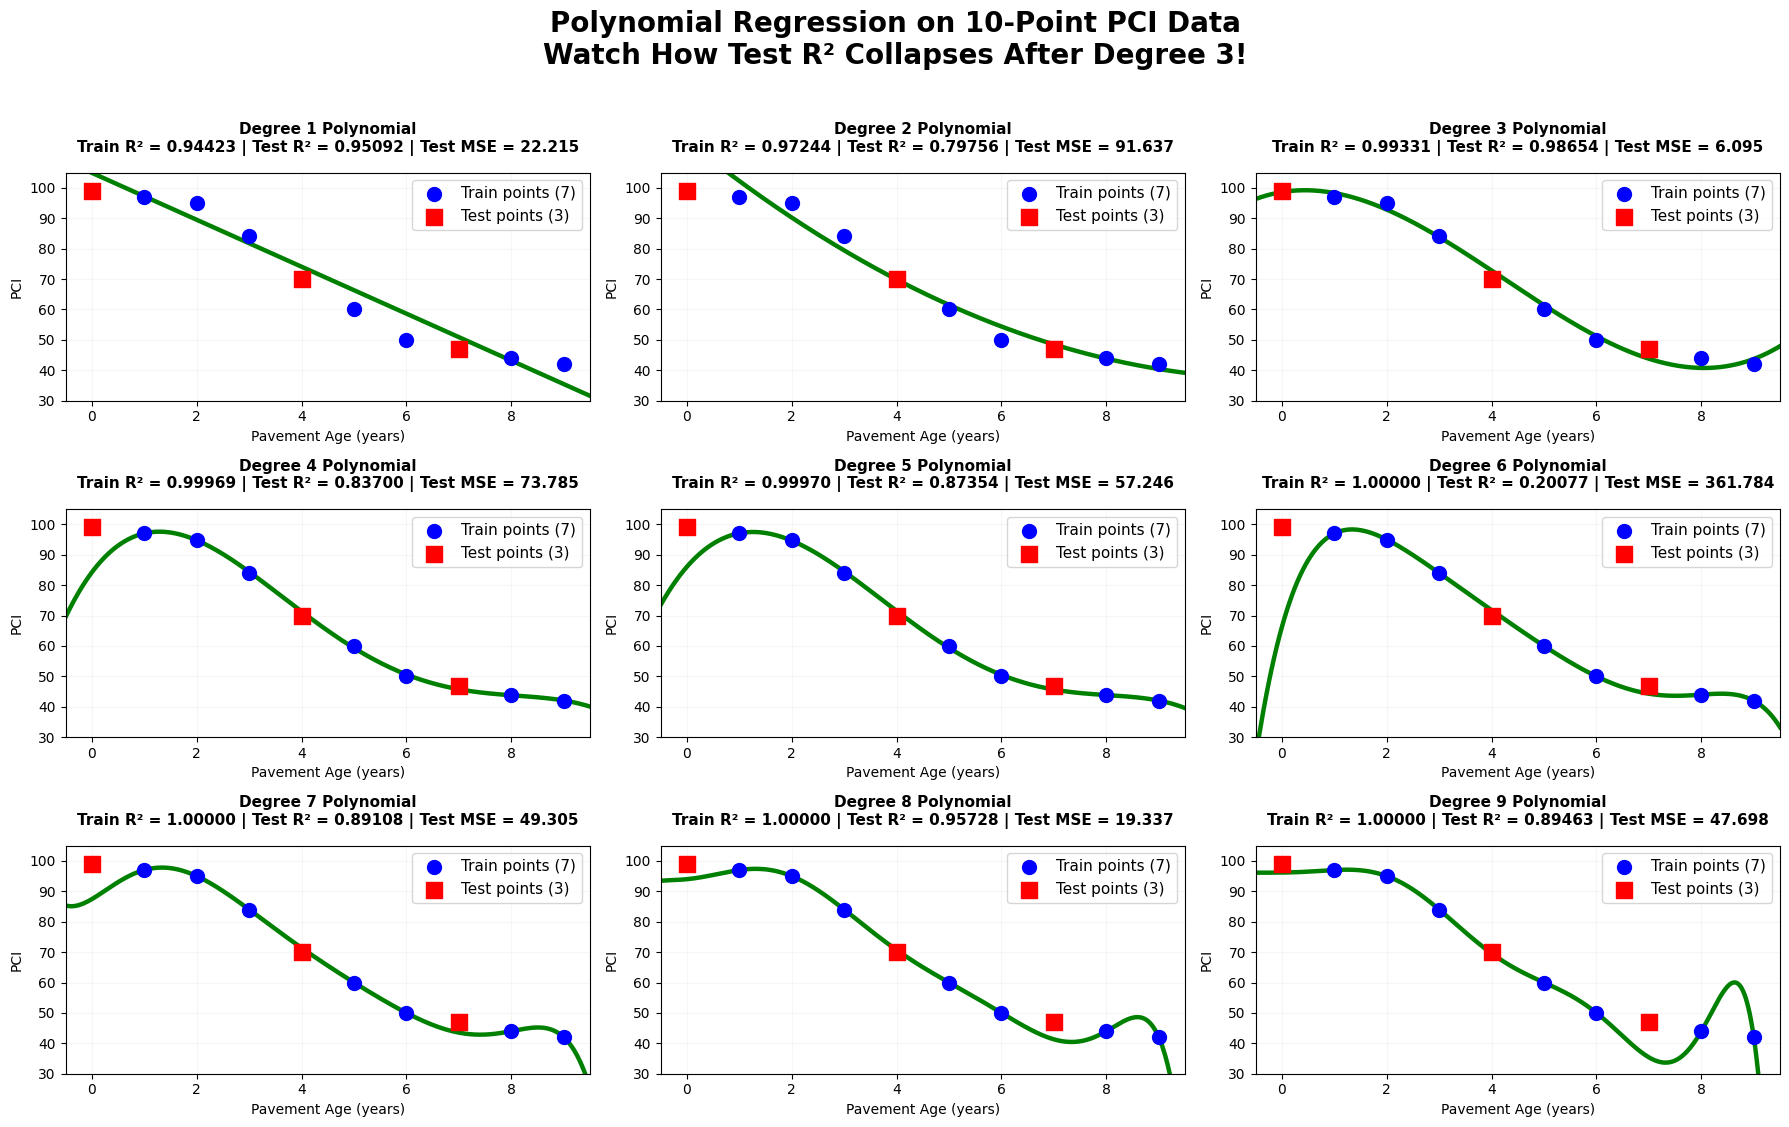

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# === YOUR EXACT 10-POINT DATA ===
data = {
    'Age': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'PCI': [99.0, 97.0, 95.0, 84.0, 70.0, 60.0, 50.0, 47.0, 44.0, 42.0]
}
df = pd.DataFrame(data)
X = df[['Age']].values
y = df['PCI'].values

# Fixed split: 7 train, 3 test (reproducible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3, random_state=123)

print("Train Ages:", sorted(X_train.flatten()))
print("Test Ages: ", sorted(X_test.flatten()))

# === Fit and plot degrees 1,2,3,4,5,20 with R² on each graph ===
degrees = [1, 2, 3, 4, 5, 6,7,8,9]
X_plot = np.linspace(-0.5, 9.5, 400).reshape(-1, 1)

fig, axes = plt.subplots(3, 3, figsize=(18, 11)) # Changed from (2, 3) to (3, 3) to accommodate 9 plots
axes = axes.ravel()

for idx, deg in enumerate(degrees):
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)
    X_plot_poly  = poly.transform(X_plot)

    model = LinearRegression().fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)
    y_plot       = model.predict(X_plot_poly)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2  = r2_score(y_test,  y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Plot
    ax = axes[idx]
    ax.scatter(X_train, y_train, color='blue', s=100, label='Train points (7)', zorder=5)
    ax.scatter(X_test,  y_test,  color='red',  s=130, marker='s', label='Test points (3)', zorder=5)
    ax.plot(X_plot, y_plot, color='green', linewidth=3.2)

    # === R² VALUES DIRECTLY ON THE TITLE ===
    ax.set_title(f'Degree {deg} Polynomial\n' # Changed \n to \\n for JSON escaping
                 f'Train R² = {train_r2:.5f} | Test R² = {test_r2:.5f} | Test MSE = {test_mse:.3f}',
                 fontsize=11, fontweight='bold', pad=15)

    ax.set_xlabel('Pavement Age (years)')
    ax.set_ylabel('PCI')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=.1)
    ax.set_ylim(30, 105)
    ax.set_xlim(-0.5, 9.5)

plt.suptitle('Polynomial Regression on 10-Point PCI Data\n' # Changed \n to \\n for JSON escaping
             'Watch How Test R² Collapses After Degree 3!',
             fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

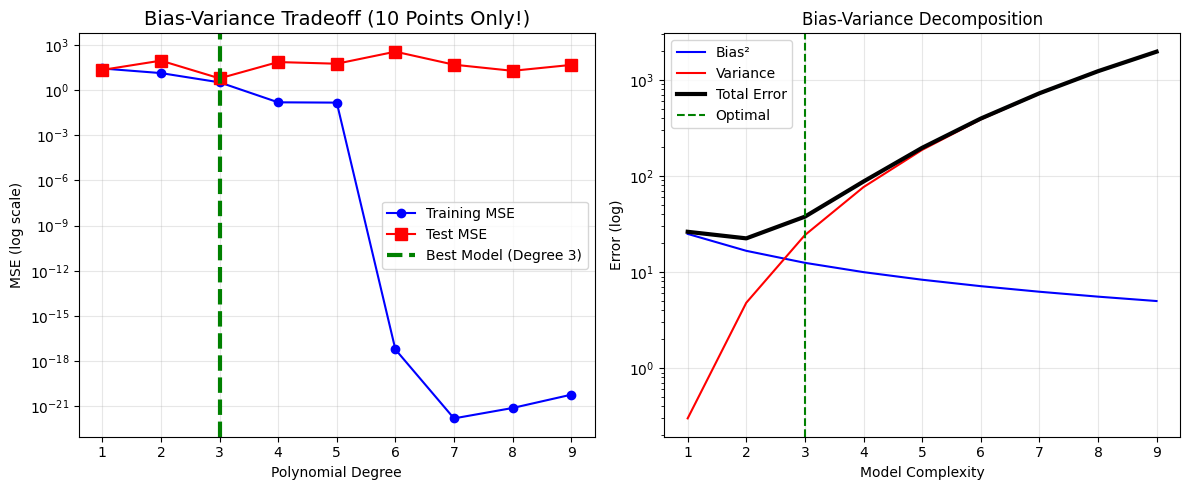

In [46]:
full_degrees = range(1, 10)
train_mses = []
test_mses = []

for d in full_degrees:
    poly = PolynomialFeatures(degree=d)
    X_tr = poly.fit_transform(X_train)
    X_te = poly.transform(X_test)
    model = LinearRegression().fit(X_tr, y_train)
    train_mses.append(mean_squared_error(y_train, model.predict(X_tr)))
    test_mses.append(mean_squared_error(y_test, model.predict(X_te)))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(full_degrees, train_mses, 'o-', label='Training MSE', color='blue')
plt.plot(full_degrees, test_mses, 's-', label='Test MSE', color='red', markersize=8)
plt.axvline(x=3, color='green', linestyle='--', linewidth=3, label='Best Model (Degree 3)')
plt.yscale('log')
plt.title('Bias-Variance Tradeoff (10 Points Only!)', fontsize=14)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE (log scale)')
plt.legend()
plt.grid(True, alpha=0.3)

# Conceptual decomposition
plt.subplot(1, 2, 2)
complexity = np.array(full_degrees)
bias2 = 50 / (complexity + 1)
variance = 0.3 * complexity**4
total = bias2 + variance + 1

plt.plot(full_degrees, bias2, label='Bias²', color='blue')
plt.plot(full_degrees, variance, label='Variance', color='red')
plt.plot(full_degrees, total, label='Total Error', color='black', linewidth=3)
plt.axvline(x=3, color='green', linestyle='--', label='Optimal')
plt.yscale('log')
plt.title('Bias-Variance Decomposition')
plt.xlabel('Model Complexity')
plt.ylabel('Error (log)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()